# Peak detection

Demonstrate how to find local maxima of a sequence of signals (numerical vector). Let's take a following vector `[7, 10, 8, 2, 6, 1]`. There are 2 local maxima - 10 and 6, even though there are numbers that are greater than 6. In the area `[7, 10, 8]` 10 is the maximum number, in the area `[2, 6, 1]` - 6 is the maximum number.

There is a function [find_peak](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) in `scipy` that implements a simple algorithm for peak detection.

In [1]:
from scipy.signal import find_peaks
import numpy as np

# an array with signals
signals = np.array([7, 10, 8, 2, 6, 1])

# get intexes of peaks
# there are some additional parameters like minimum distance between
# neighbouring peaks and minimum heigh of a peak
indexes = find_peaks(signals)

signals[indexes[0]]

array([10,  6])

## Example

As an example, I take the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) from `sklearn` datasets and calculate magnesium peaks assuming that wine bottles were tasted one after another.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

data = datasets.load_wine(as_frame=True)['data']
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
min_magnesium_level = data.magnesium.quantile(0.95)

peaks = find_peaks(data.magnesium, distance=1,
                   height=min_magnesium_level)[0]

peaks

array([20, 33, 39, 69, 73, 78, 95])

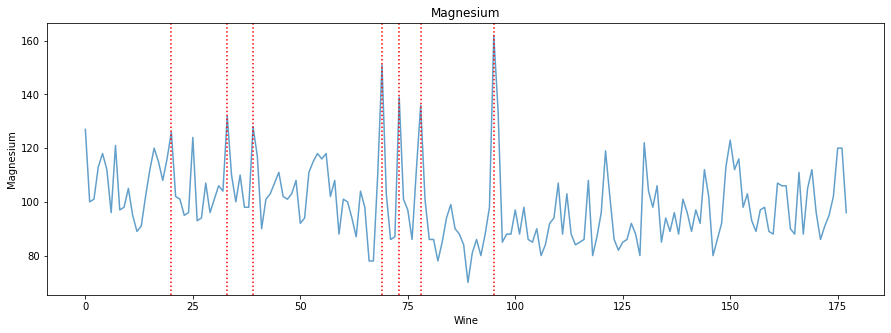

In [6]:
plt.figure(figsize=(15, 5))

data.magnesium.plot(alpha=0.7);

for p in peaks:
    plt.axvline(p, color='r', linestyle=':', linewidth=1.5);

plt.title('Magnesium')
plt.xlabel('Wine')
plt.ylabel('Magnesium');